# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import chromedriver_autoinstaller

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
chromedriver_autoinstaller.install()
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = pd.read_html(html)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_df = table[0]

# Loop through the scraped data to create a list of rows
rows = []
table = soup.find('table') 
for row in table.find_all('tr')[1:]: 
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]  
    rows.append(cols)   # Append the row to the rows list
    print(rows)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df.columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].unique()
num_unique_months = len(unique_months)
print (num_unique_months)

12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_unique_sols = mars_df['sol'].nunique()
print(num_unique_sols)

1867


In [14]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

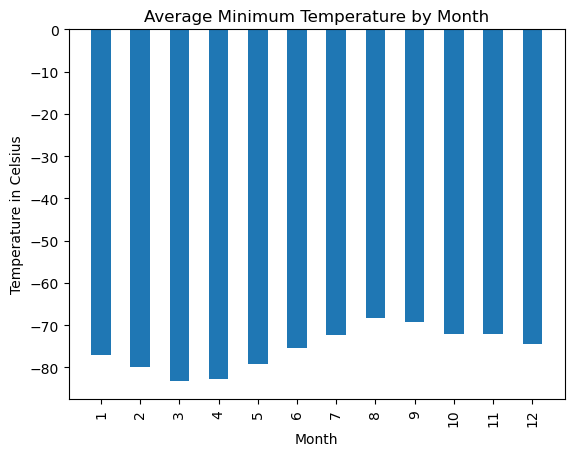

In [15]:
# Plot the average minimum temperature by month
plt.bar(average_min_temp.index, average_min_temp.values, width=0.5)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(ticks=range(1, len(average_min_temp.index) + 1), labels=average_min_temp.index, rotation=90)
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_df = average_min_temp.reset_index().sort_values(by='min_temp', ascending=True)
print(sorted_temp_df)

    month   min_temp
2       3 -83.307292
3       4 -82.747423
1       2 -79.932584
4       5 -79.308725
0       1 -77.160920
5       6 -75.299320
11     12 -74.451807
6       7 -72.281690
10     11 -71.985507
9      10 -71.982143
8       9 -69.171642
7       8 -68.382979


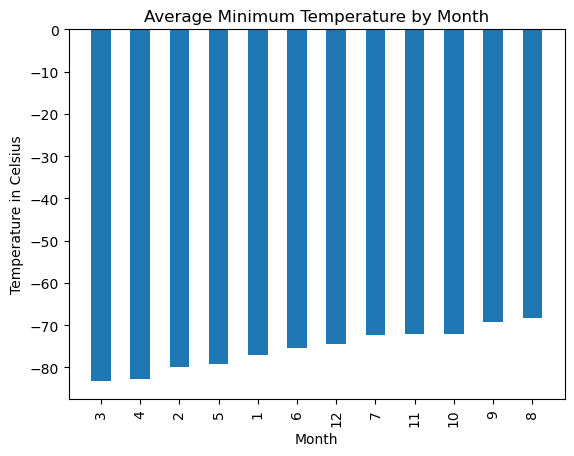

In [17]:
# Plot the bar chart for sorted temperature (hottest to coldest)
plt.bar(sorted_temp_df['month'].astype(str), sorted_temp_df['min_temp'], width=0.5)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=90)
plt.show()


In [18]:
# 4. What is the average pressure by month?
average_pressure = mars_df.groupby('month')['pressure'].mean().reset_index()
print(average_pressure)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


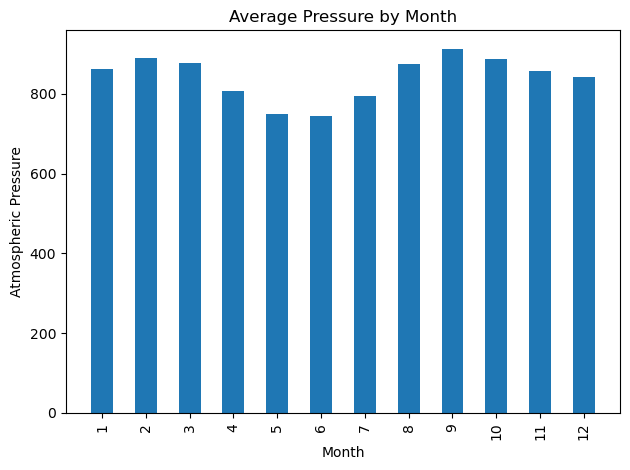

In [19]:
# Plot the average pressure by month
plt.bar(average_pressure['month'], average_pressure['pressure'], width=0.5)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.xticks(ticks=range(1, len(average_pressure['month']) + 1), labels=average_pressure['month'], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
sorted_pressure = average_pressure.sort_values(by='pressure', ascending=True)
print(sorted_pressure)

    month    pressure
5       6  745.054422
4       5  748.557047
6       7  795.105634
3       4  806.329897
11     12  842.156627
10     11  857.014493
0       1  862.488506
7       8  873.829787
2       3  877.322917
9      10  887.312500
1       2  889.455056
8       9  913.305970


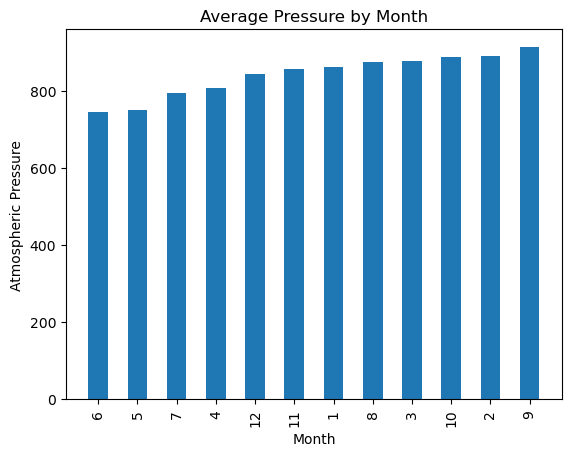

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
plt.bar(sorted_pressure['month'].astype(str), sorted_pressure['pressure'], width=0.5)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.show()

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
daily_min_temp = mars_df.groupby('sol')['min_temp'].min().reset_index()
daily_min_temp.head()

,sol,min_temp
0,10,-75.0
1,11,-76.0
2,12,-76.0
3,13,-74.0
4,14,-74.0


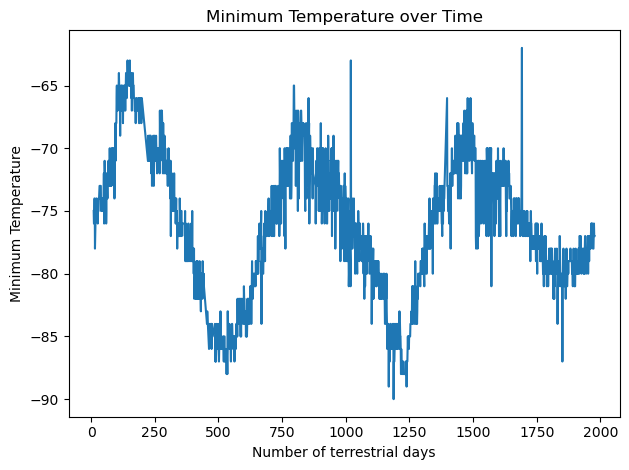

In [23]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(daily_min_temp['sol'], daily_min_temp['min_temp'], linestyle='-')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.tight_layout()
plt.show()

#### Minimum Temperature

Mars is extremely cold, with minimum temperatures ranging from around -65°C to -90°C. The temperatures go through cycles, showing seasonal changes like we have on Earth, but they're more noticeable because Mars has a longer year. The lowest temperatures usually happen during the winter months.

#### Atmospheric Pressure

Mars' atmospheric pressure changes throughout the year. It gradually rises during certain months and peaks. The pressure ranges from 600 to 900 Pascals, which is lower than Earth's, but it fluctuates a lot with the changing seasons.

#### Year Length

A Martian year lasts 687 Earth days, almost twice as long as a year on Earth. Because of this, Mars has longer seasons, and changes in temperature and pressure happen more gradually and over longer periods. The seasonal patterns take more time to complete, which you can see in the data's repeating cycles.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('Mars_df.csv', index=False)

In [25]:
browser.quit()